<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20Autoregressive%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam

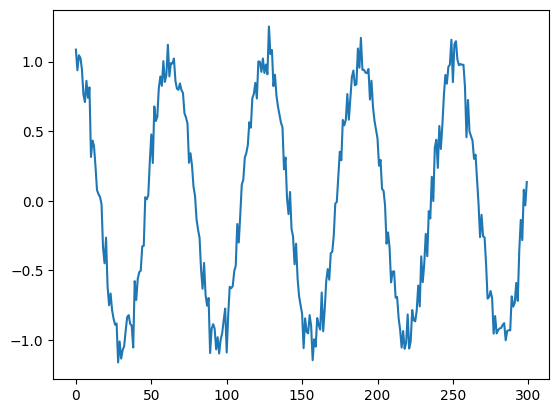

In [ ]:
# Make the original data
series = np.cos(0.1 * np.arange(300)) + np.random.randn(300)*0.1

plt.plot(series)
plt.show()

In [17]:
# Build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (290, 10) Y.shape (290,)


In [18]:
# Try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

# train 
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
5/5 [==============================] - 0s 19ms/step - loss: 0.2442 - val_loss: 0.0592
Epoch 2/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0836 - val_loss: 0.0431
Epoch 3/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0564 - val_loss: 0.0433
Epoch 4/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0420 - val_loss: 0.0409
Epoch 5/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.0356
Epoch 6/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0312 - val_loss: 0.0308
Epoch 7/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0317
Epoch 8/80
5/5 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.0272
Epoch 9/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.0253
Epoch 10/80
5/5 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.0240
Epoch 11/80
5/5 [=====================

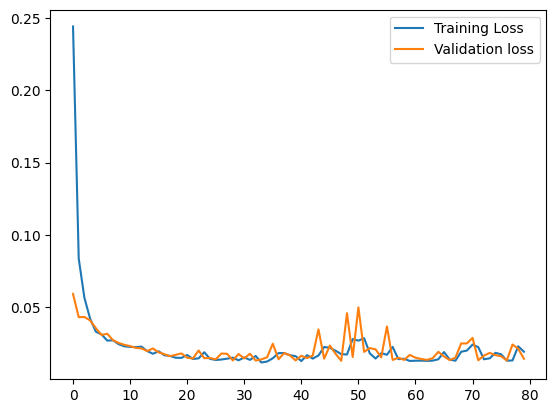

In [19]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="Training Loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.legend()

In [20]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array
  
  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1) # shift everything one spot to the left, we replace it with the latest forecasted prediction. Multi-step predictions.
  last_x[-1] = p

1/1 [==============================] - 0s 13ms/step


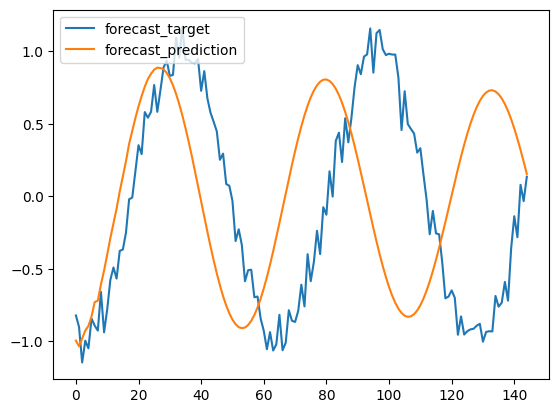

In [21]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()